In [ ]:
import torch
from torchvision import datasets, transforms, models
from torch.utils.data import Dataset, DataLoader

In [ ]:
DEVICE = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

print(f"using PyTorch version: {torch.__version__}, Device: {DEVICE}")

using PyTorch version: 2.2.1+cu121, Device: cpu


Google Drive 마운트

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


데이터 다운로드 from Google Drive

In [ ]:
import shutil

shutil.copy('/content/gdrive/My Drive/Colab Notebooks/dataset/pytorch_dog_image.zip', '/content/')

'/content/pytorch_dog_image.zip'

In [ ]:
import os
import shutil

if os.path.exists( os.path.join('/content', 'dog_image') ):
    shutil.rmtree( os.path.join('/content', 'dog_image') )

In [ ]:
import zipfile

with zipfile.ZipFile(os.path.join('/content', 'pytorch_dog_image.zip'), 'r') as target_file:

    target_file.extractall(os.path.join('/content', 'dog_image'))

학습데이터 정답 확인

In [ ]:
import os
import glob

label_name_list = os.listdir(os.path.join('/content', 'dog_image/train/'))

print('total label nums = ', len(label_name_list))
print('=================================================')
print(label_name_list)

total label nums =  4
['yorkshire_terrier', 'chihuahua', 'jindo_dog', 'shepherd']


In [ ]:
train_config = transforms.Compose([transforms.Resize((224,224)),
                                   transforms.RandomHorizontalFlip(),
                                   transforms.ToTensor()])

validation_config = transforms.Compose([transforms.Resize((224,224)),
                                        transforms.ToTensor()])

test_config = transforms.Compose([transforms.Resize((224,224)),
                                  transforms.ToTensor()])

In [ ]:
train_dataset = datasets.ImageFolder('/content/dog_image/train/', train_config)

validation_dataset = datasets.ImageFolder('/content/dog_image/validation/', validation_config)

test_dataset = datasets.ImageFolder('/content/dog_image/test/', test_config)

In [ ]:
print(train_dataset)

print(validation_dataset)

print(test_dataset)

Dataset ImageFolder
    Number of datapoints: 1196
    Root location: /content/dog_image/train/
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
Dataset ImageFolder
    Number of datapoints: 221
    Root location: /content/dog_image/validation/
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )
Dataset ImageFolder
    Number of datapoints: 63
    Root location: /content/dog_image/test/
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )


In [ ]:
train_class_names = train_dataset.classes # 클래스 이름 출력
train_class_idx = train_dataset.class_to_idx # 클래스 인덱스 출력

print('\ntrain data nums => ', len(train_dataset))
print(train_class_names)
print(train_class_idx)

validation_class_names = validation_dataset.classes # 클래스 이름 출력
validation_class_idx = validation_dataset.class_to_idx # 클래스 인덱스 출력

print('\nvalidation data nums => ', len(validation_dataset))
print(validation_class_names)
print(validation_class_idx)

test_class_names = test_dataset.classes # 클래스 이름 출력
test_class_idx = test_dataset.class_to_idx # 클래스 인덱스 출력

print('\test data nums => ', len(test_dataset))
print(test_class_names)
print(test_class_idx)


train data nums =>  1196
['chihuahua', 'jindo_dog', 'shepherd', 'yorkshire_terrier']
{'chihuahua': 0, 'jindo_dog': 1, 'shepherd': 2, 'yorkshire_terrier': 3}

validation data nums =>  221
['chihuahua', 'jindo_dog', 'shepherd', 'yorkshire_terrier']
{'chihuahua': 0, 'jindo_dog': 1, 'shepherd': 2, 'yorkshire_terrier': 3}
	est data nums =>  63
['chihuahua', 'jindo_dog', 'shepherd', 'yorkshire_terrier']
{'chihuahua': 0, 'jindo_dog': 1, 'shepherd': 2, 'yorkshire_terrier': 3}


In [ ]:
BATCH_SIZE = 32

train_dataset_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)

validation_dataset_loader = DataLoader(validation_dataset, batch_size=BATCH_SIZE, shuffle=False)

test_dataset_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

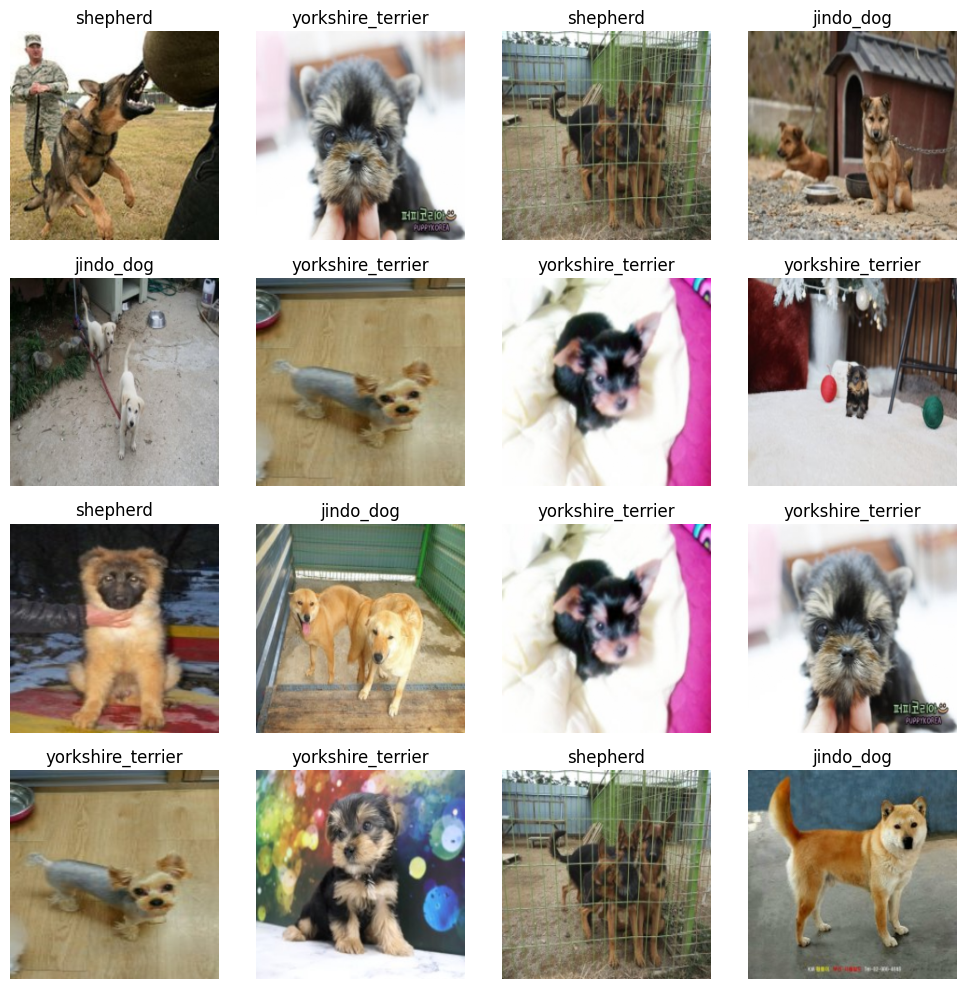

In [ ]:
import matplotlib.pyplot as plt

# 1개의 배치를 추출, 현재 32개 이미지-라벨 추출됨
train_images, train_labels = next(iter(train_dataset_loader))

# { class_index : class_name } 생성
labels_map = { class_index:class_name  for class_name, class_index in train_dataset.class_to_idx.items() }

plt.figure(figsize=(10,10))

cols, rows = 4, 4

for pos in range(cols*rows):

    plt.subplot(4,4,pos+1)

    sample_idx = torch.randint(len(train_images), size=(1,)).item()
    img, label = train_images[sample_idx], train_labels[sample_idx].item()

    plt.title(labels_map[label])
    plt.axis('off')

    # 본래 이미지의 shape은 (3, 224, 224) 인데,
    # 이를 imshow() 함수로 이미지 시각화 하기 위하여 (224, 224, 3)으로 shape 변경 후 시각화
    plt.imshow(torch.permute(img, (1, 2, 0)))

plt.tight_layout()
plt.show()

In [ ]:
pretrained_model = models.vit_b_16(weights=models.ViT_B_16_Weights.DEFAULT)

print(pretrained_model)

Downloading: "https://download.pytorch.org/models/vit_b_16-c867db91.pth" to /root/.cache/torch/hub/checkpoints/vit_b_16-c867db91.pth
100%|██████████| 330M/330M [00:02<00:00, 159MB/s]


VisionTransformer(
  (conv_proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
  (encoder): Encoder(
    (dropout): Dropout(p=0.0, inplace=False)
    (layers): Sequential(
      (encoder_layer_0): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_attention): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
        )
        (dropout): Dropout(p=0.0, inplace=False)
        (ln_2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU(approximate='none')
          (2): Dropout(p=0.0, inplace=False)
          (3): Linear(in_features=3072, out_features=768, bias=True)
          (4): Dropout(p=0.0, inplace=False)
        )
      )
      (encoder_layer_1): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_a

In [ ]:
class MyTransferLearningModel(torch.nn.Module):

    def __init__(self, pretrained_model, feature_extractor):
        super().__init__()

        if (feature_extractor):
            for param in pretrained_model.parameters():
                param.require_grad = False

        pretrained_model.heads = torch.nn.Sequential(
            torch.nn.Linear(pretrained_model.heads[0].in_features, 256),
            torch.nn.ReLU(),
            torch.nn.Dropout(0.5),
            torch.nn.Linear(256, 64),
            torch.nn.ReLU(),
            torch.nn.Dropout(0.5),
            torch.nn.Linear(64, 4), # 4종류의 강아지 분류이므로 out_features=4로 설정
        )

        self.model = pretrained_model

    def forward(self, data):
        logits = self.model(data)

        return logits

In [ ]:
feature_extractor = False  # True: Feature Extractor,  False: Fine Tuning

model = MyTransferLearningModel(pretrained_model, feature_extractor).to(DEVICE)

loss_function = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr = 1e-6)

In [ ]:
def model_train(dataloader, model, loss_function, optimizer):

    model.train()

    train_loss_sum = train_correct = train_total = 0

    total_train_batch = len(dataloader)

    for images, labels in dataloader:

        x_train = images.to(DEVICE)
        y_train = labels.to(DEVICE)

        outputs = model(x_train)
        loss = loss_function(outputs, y_train)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss_sum += loss.item()

        train_total += y_train.size(0)
        train_correct += ((torch.argmax(outputs, 1)==y_train)).sum().item()

    train_avg_loss = train_loss_sum / total_train_batch
    train_avg_accuracy = 100*train_correct / train_total

    return (train_avg_loss, train_avg_accuracy)

In [ ]:
def model_evaluate(dataloader, model, loss_function, optimizer):

    model.eval()

    with torch.no_grad():

        val_loss_sum = val_correct = val_total = 0

        total_val_batch = len(dataloader)

        for images, labels in dataloader:

            x_val = images.to(DEVICE)
            y_val = labels.to(DEVICE)

            outputs = model(x_val)
            loss = loss_function(outputs, y_val)

            val_loss_sum += loss.item()

            val_total += y_val.size(0)
            val_correct += ((torch.argmax(outputs, 1)==y_val)).sum().item()

        val_avg_loss = val_loss_sum / total_val_batch
        val_avg_accuracy = 100*val_correct / val_total

    return (val_avg_loss, val_avg_accuracy)

In [ ]:
def model_test(dataloader, model):

    model.eval()

    with torch.no_grad():

        test_loss_sum = test_correct = test_total = 0

        total_test_batch = len(dataloader)

        for images, labels in dataloader:

            x_test = images.to(DEVICE)
            y_test = labels.to(DEVICE)

            outputs = model(x_test)
            loss = loss_function(outputs, y_test)

            test_loss_sum += loss.item()

            test_total += y_test.size(0)
            test_correct += ((torch.argmax(outputs, 1)==y_test)).sum().item()

        test_avg_loss = test_loss_sum / total_test_batch
        test_avg_accuracy = 100*test_correct / test_total

        print('accuracy:', test_avg_accuracy)
        print('loss:', test_avg_loss)

In [ ]:
from datetime import datetime

train_loss_list = []
train_accuracy_list = []

val_loss_list = []
val_accuracy_list = []

start_time = datetime.now()

EPOCHS = 40

for epoch in range(EPOCHS):

    #==============  model train  ================
    train_avg_loss, train_avg_accuracy = model_train(train_dataset_loader, model, loss_function, optimizer)

    train_loss_list.append(train_avg_loss)
    train_accuracy_list.append(train_avg_accuracy)
    #=============================================

    #============  model evaluation  ==============
    val_avg_loss, val_avg_accuracy = model_evaluate(validation_dataset_loader, model, loss_function, optimizer)

    val_loss_list.append(val_avg_loss)
    val_accuracy_list.append(val_avg_accuracy)
    #============  model evaluation  ==============

    print('epoch:', '%02d' % (epoch + 1),
          'train loss =', '{:.3f}'.format(train_avg_loss), 'train acc =', '{:.3f}'.format(train_avg_accuracy),
          'val loss =', '{:.3f}'.format(val_avg_loss), 'val acc =', '{:.3f}'.format(val_avg_accuracy))

end_time = datetime.now()

print('elapsed time => ', end_time-start_time)

epoch: 01 train loss = 1.387 train acc = 27.508 val loss = 1.375 val acc = 32.127
epoch: 02 train loss = 1.370 train acc = 30.184 val loss = 1.362 val acc = 46.606
epoch: 03 train loss = 1.356 train acc = 34.030 val loss = 1.347 val acc = 59.729
epoch: 04 train loss = 1.343 train acc = 39.548 val loss = 1.330 val acc = 72.851
epoch: 05 train loss = 1.329 train acc = 43.980 val loss = 1.309 val acc = 78.733
epoch: 06 train loss = 1.311 train acc = 47.993 val loss = 1.286 val acc = 80.543
epoch: 07 train loss = 1.289 train acc = 52.759 val loss = 1.259 val acc = 82.353
epoch: 08 train loss = 1.260 train acc = 56.020 val loss = 1.225 val acc = 85.520
epoch: 09 train loss = 1.229 train acc = 61.371 val loss = 1.189 val acc = 88.235
epoch: 10 train loss = 1.197 train acc = 65.301 val loss = 1.152 val acc = 90.045
epoch: 11 train loss = 1.161 train acc = 68.562 val loss = 1.114 val acc = 90.950
epoch: 12 train loss = 1.131 train acc = 71.488 val loss = 1.075 val acc = 92.308
epoch: 13 train 

In [ ]:
# test dataset 으로 정확도 및 오차 테스트

model_test(test_dataset_loader, model)

accuracy: 96.82539682539682
loss: 0.4620939940214157


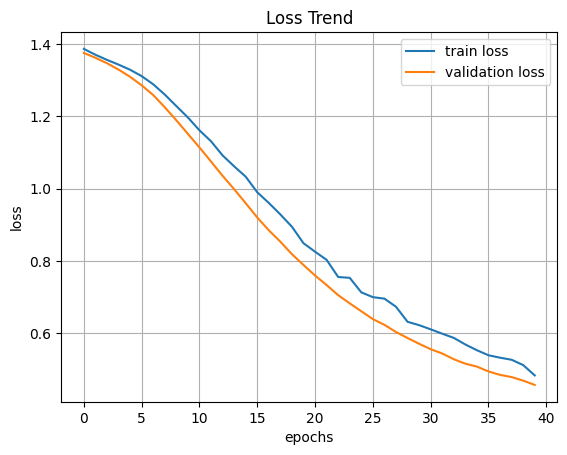

In [ ]:
import matplotlib.pyplot as plt

plt.title('Loss Trend')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(train_loss_list, label='train loss')
plt.plot(val_loss_list, label='validation loss')

plt.legend()

plt.show()

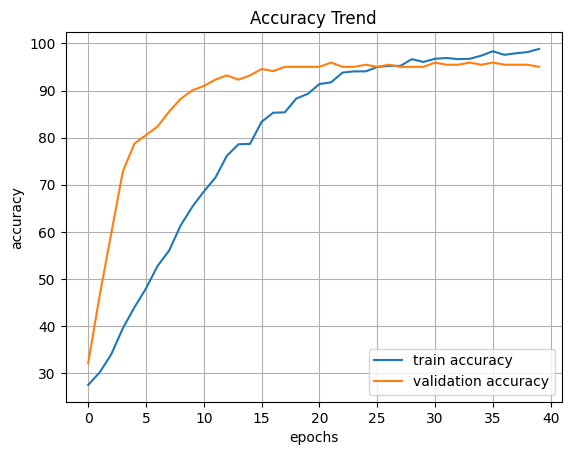

In [ ]:
import matplotlib.pyplot as plt

plt.title('Accuracy Trend')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(train_accuracy_list, label='train accuracy')
plt.plot(val_accuracy_list, label='validation accuracy')

plt.legend()

plt.show()

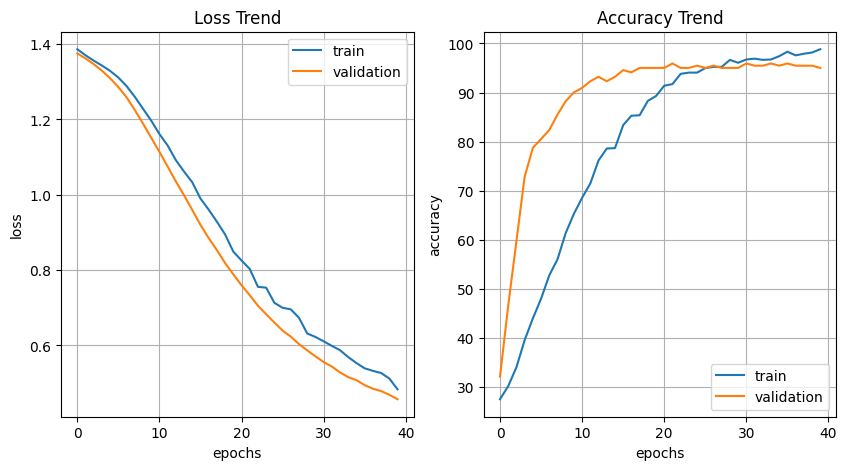

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title('Loss Trend')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.plot(train_loss_list, label='train')
plt.plot(val_loss_list, label='validation')
plt.legend()

plt.subplot(1,2,2)
plt.title('Accuracy Trend')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()
plt.plot(train_accuracy_list, label='train')
plt.plot(val_accuracy_list, label='validation')
plt.legend()

plt.show()

In [ ]:
test_images_loader = DataLoader(test_dataset, batch_size=len(test_dataset), shuffle=False)

# 모든 테스트 데이터에 대해 이미지-라벨 추출됨
test_images, test_labels = next(iter(test_images_loader))

x_test = test_images.to(DEVICE)
y_test = test_labels.to(DEVICE)

# batch siez 만큼 추출된 이미지에 대해 inference
outputs = model(x_test)

_, preds = torch.max(outputs, 1)  # 예측 값 추출

print('label => ', y_test)
print('preds => ', preds)

label =>  tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], device='cuda:0')
preds =>  tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], device='cuda:0')


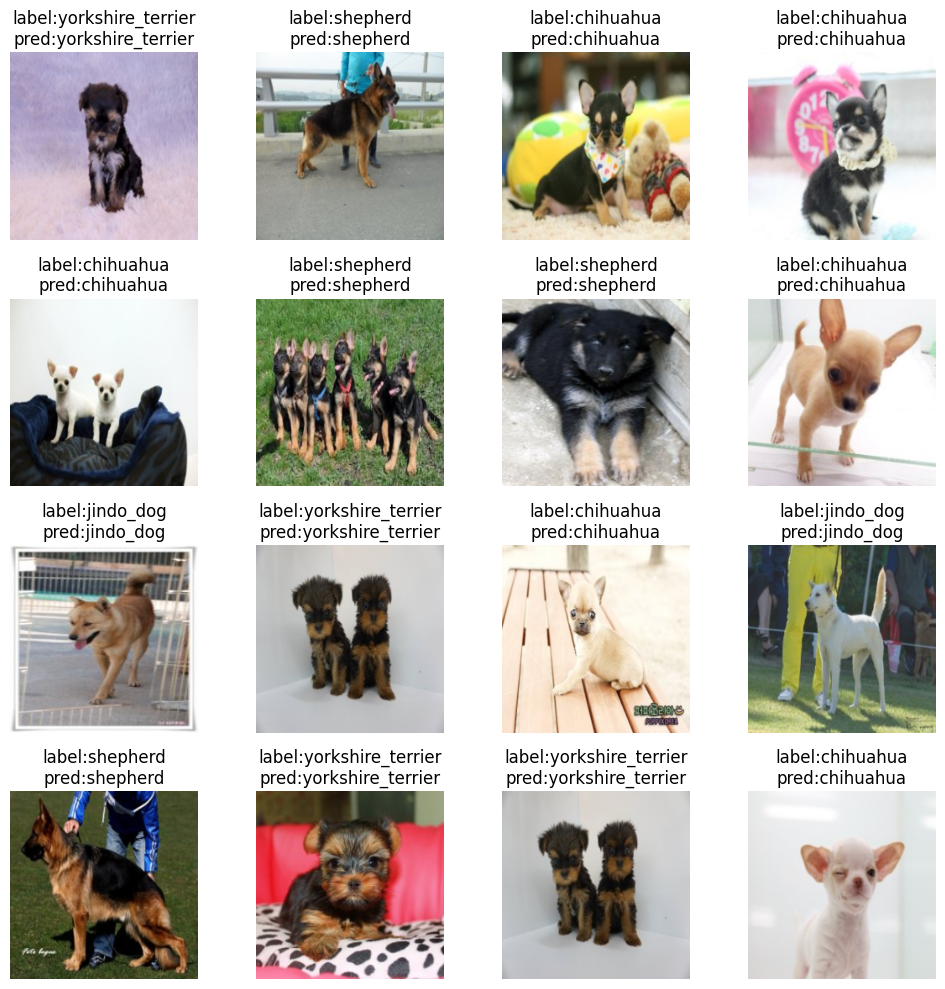

In [ ]:
import matplotlib.pyplot as plt

# { class_index : class_name } 생성
labels_map = { class_index:class_name  for class_name, class_index in train_dataset.class_to_idx.items() }

plt.figure(figsize=(10,10))

cols, rows = 4, 4

for pos in range(cols*rows):

    plt.subplot(4,4,pos+1)

    sample_idx = torch.randint(len(x_test), size=(1,)).item()

    img, label, pred = test_images[sample_idx], test_labels[sample_idx].item(), preds[sample_idx].item()

    plt.title('label:' + labels_map[label] + '\npred:' + labels_map[pred])
    plt.axis('off')

    # 본래 이미지의 shape은 (3, 224, 224) 인데,
    # 이를 imshow() 함수로 이미지 시각화 하기 위하여 (224, 224, 3)으로 shape 변경 후 시각화
    plt.imshow(torch.permute(img, (1, 2, 0)))

plt.tight_layout()
plt.show()